In [84]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 분석을 위해 MBR_MOVIE_11MONTH.csv 로 부터 dataFrame 을 얻도록 한다.
df = pd.read_csv('./csv files/MBR_MOVIE_11MONTH.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49461 entries, 0 to 49460
Data columns (total 11 columns):
구분          49461 non-null object
년           49461 non-null int64
월           49461 non-null int64
일           49461 non-null int64
요일          49461 non-null object
지역-시도       49461 non-null object
지역-시군구      49461 non-null object
지역-읍면동      49461 non-null object
성별          49461 non-null object
연령대         49461 non-null object
이용_비율(%)    49461 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 2.8+ MB


In [73]:
df.head()

,구분,년,월,일,요일,지역-시도,지역-시군구,지역-읍면동,성별,연령대,이용_비율(%)
0,영화관,2016,11,1,화,강원도,속초시,조양동,여,20대,0.00194
1,영화관,2016,11,1,화,강원도,원주시,단구동,남,20대,0.00032
2,영화관,2016,11,1,화,강원도,원주시,단계동,남,40대,0.00065
3,영화관,2016,11,1,화,강원도,원주시,반곡동,남,20대,0.00097
4,영화관,2016,11,1,화,강원도,속초시,조양동,남,60대이상,0.00032


In [74]:
gs = df.groupby(["지역-시군구"])
call_num = gs["이용_비율(%)"]
#call_num.sum()
df5 = call_num.agg(["sum"])
df5.head()

,sum
지역-시군구,
강남구,8.54317
강동구,0.38339
강릉시,0.10782
강북구,0.20880
강서구,1.75559


In [75]:
df7 =  df.pivot_table(["이용_비율(%)"], index=["지역-시군구", "지역-읍면동"], aggfunc='sum')
df7

이용_비율(%)
지역-시군구   지역-읍면동          
강남구      논현동      0.07811
         삼성동      7.10753
         신사동      0.19800
         역삼동      1.15953
강동구      성내동      0.23459
         천호동      0.14880
강릉시      성남동      0.10782
강북구      미아동      0.20880
강서구      등촌동      0.12554
         오곡동      0.33986
         화곡동      1.29019
거제시      장평동      0.12532
거창군      거창읍      0.23246
경산시      대평동      0.05302
         하양읍      0.25240
경주시      노동동      0.65131
계양구      서운동      0.10996
고양시 덕양구  화정동      0.09534
고양시 일산동구 백석동      1.93040
         장항동      0.25035
고양시 일산서구 대화동      1.15107
         덕이동      0.59910
         주엽동      0.05160
공주시      신관동      1.05398
관악구      봉천동      0.18738
         신림동      0.35377
광명시      광명동      0.08363
         일직동      0.10675
         철산동      0.05693
광산구      신가동      0.08458
...                   ...
천안시 동남구  사직동      0.07180
천안시 서북구  불당동      0.25763
         성정동      1.50078
청주시 상당구  북문로1가    0.15367
         수동       0.03236
         용암동      0.01480
청주시 서원구  사창동      0.01965
청주시 흥덕구  가경동      0.04524
         비하동      0.07918
         향정동      0.26415
춘천시      중앙로2가    0.04802
         퇴계동      0.13736
통영시      무전동      0.06145
파주시      금촌동      0.46586
         문산읍      0.03255
         서패동      0.33245
평택시      비전동      0.02285
         서정동      0.03854
         평택동      0.56256
포항시 남구   상도동      0.13760
포항시 북구   동빈2가     0.08201
         상원동      0.04153
하남시      창우동      1.25573
해운대구     우동       0.75565
         좌동       0.42360
         중동       0.02941
화성시      반송동      0.51528
         병점동      0.05948
         석우동      0.21604
         향남읍      0.05616

[254 rows x 1 columns]

In [76]:
df6 =  df.pivot_table(["이용_비율(%)"], index=["지역-시도"], aggfunc='sum')
df6

,이용_비율(%)
지역-시도,
강원도,1.94201
경기도,20.84362
경상남도,2.76165
경상북도,3.08892
광주광역시,9.72582
대구광역시,3.81451
대전광역시,2.39721
부산광역시,6.04404
서울특별시,31.19671


In [126]:
df9 = df[ (df["지역-시도"] == "서울특별시")]
df9.pivot_table(["이용_비율(%)"], index=["지역-시군구", "지역-읍면동"], aggfunc='sum')
df9.head()

,구분,년,월,일,요일,지역-시도,지역-시군구,지역-읍면동,성별,연령대,이용_비율(%)
880,영화관,2016,11,1,화,서울특별시,강남구,신사동,남,50대,0.00032
881,영화관,2016,11,1,화,서울특별시,강남구,역삼동,남,30대,0.00210
882,영화관,2016,11,1,화,서울특별시,노원구,상계동,여,50대,0.00065
883,영화관,2016,11,1,화,서울특별시,영등포구,영등포동4가,여,10대,0.00032
884,영화관,2016,11,1,화,서울특별시,중랑구,상봉동,여,20대,0.00680


In [130]:
df2 = df9[ (df["지역-시군구"] == "강남구") | (df["지역-시군구"] == "노원구") |(df["지역-시군구"] == "중구")|(df["지역-시군구"] == "종로구")|(df["지역-시군구"] == "은평구")|(df["지역-시군구"] == "용산구")|(df["지역-시군구"] == "영등포구")|(df["지역-시군구"] == "양천구")|(df["지역-시군구"] == "송파구")|(df["지역-시군구"] == "성동구")|(df["지역-시군구"] == "서초구")|(df["지역-시군구"] == "서대문구")|(df["지역-시군구"] == "마포구")|(df["지역-시군구"] == "동작구")|(df["지역-시군구"] == "동대문구")|(df["지역-시군구"] == "금천구")|(df["지역-시군구"] == "구로구")|(df["지역-시군구"] == "광진구")|(df["지역-시군구"] == "관악구")|(df["지역-시군구"] == "강서구")|(df["지역-시군구"] == "강동구") ]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10416 entries, 880 to 49057
Data columns (total 11 columns):
구분          10416 non-null object
년           10416 non-null int64
월           10416 non-null int64
일           10416 non-null int64
요일          10416 non-null object
지역-시도       10416 non-null object
지역-시군구      10416 non-null object
지역-읍면동      10416 non-null object
성별          10416 non-null object
연령대         10416 non-null object
이용_비율(%)    10416 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 691.7+ KB


c:\python27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [131]:
df2.head()

,구분,년,월,일,요일,지역-시도,지역-시군구,지역-읍면동,성별,연령대,이용_비율(%)
880,영화관,2016,11,1,화,서울특별시,강남구,신사동,남,50대,0.00032
881,영화관,2016,11,1,화,서울특별시,강남구,역삼동,남,30대,0.00210
882,영화관,2016,11,1,화,서울특별시,노원구,상계동,여,50대,0.00065
883,영화관,2016,11,1,화,서울특별시,영등포구,영등포동4가,여,10대,0.00032
885,영화관,2016,11,1,화,서울특별시,중구,을지로6가,남,50대,0.00227


In [132]:
df2.tail()

,구분,년,월,일,요일,지역-시도,지역-시군구,지역-읍면동,성별,연령대,이용_비율(%)
49051,영화관,2016,11,30,수,서울특별시,마포구,서교동,남,20대,0.00194
49052,영화관,2016,11,30,수,서울특별시,광진구,자양동,남,50대,0.00194
49055,영화관,2016,11,30,수,서울특별시,강서구,등촌동,남,40대,0.00275
49056,영화관,2016,11,30,수,서울특별시,금천구,독산동,남,40대,0.00097
49057,영화관,2016,11,30,수,서울특별시,용산구,한강로3가,남,30대,0.00971


In [133]:
df3 = df2.pivot_table(["이용_비율(%)"], index=["지역-시군구", "지역-읍면동"], aggfunc='sum')
df3

이용_비율(%)
지역-시군구 지역-읍면동          
강남구    논현동      0.07811
       삼성동      7.10753
       신사동      0.19800
       역삼동      1.15953
강동구    성내동      0.23459
       천호동      0.14880
강서구    등촌동      0.12554
       오곡동      0.33986
       화곡동      1.29019
관악구    봉천동      0.18738
       신림동      0.35377
광진구    구의동      0.23092
       능동       0.11575
       자양동      0.43087
구로구    구로동      0.19508
       신도림동     0.28970
금천구    가산동      0.13552
       독산동      0.11848
노원구    상계동      0.35156
       중계동      0.24530
동대문구   장안동      0.10185
       전농동      0.25706
동작구    사당동      1.86786
마포구    동교동      0.19302
       상암동      0.03575
       서교동      0.29752
       성산동      0.23641
서대문구   대현동      0.16677
       신촌동      1.52503
서초구    반포동      1.94236
       서초동      1.63476
성동구    행당동      0.30911
송파구    문정동      0.33483
       신천동      0.73110
양천구    목동       2.52176
영등포구   영등포동4가   0.50283
용산구    한강로3가    0.45890
은평구    대조동      0.25176
       불광동      0.65463
종로구    돈의동      0.09540
       혜화동      0.14675
중구     남대문로2가   0.12710
       명동2가     0.18819
       을지로6가    1.87011
       황학동      0.02782

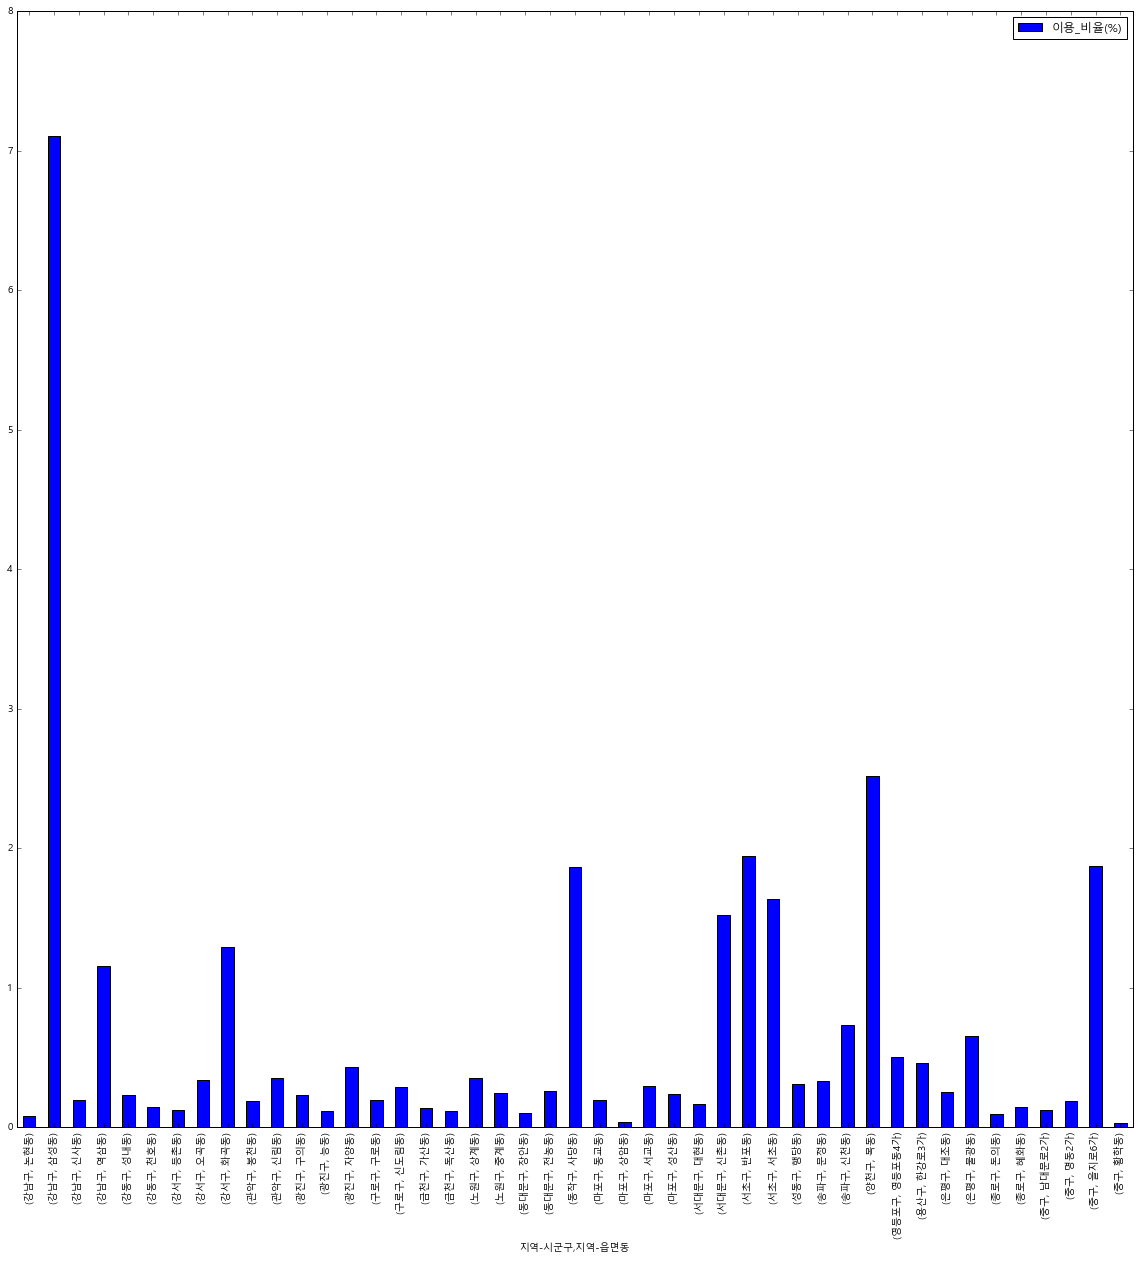

In [134]:
df3.plot(kind="bar", figsize = (20, 20))
plt.show()

In [136]:
df3.plot.hist(bins = 10)
plt.title('average ratings')
plt.xlabel('ratings')

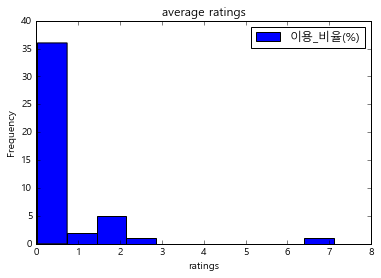

In [137]:
plt.show()